In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
file_path = 'dataKasus-1.xlsx'  # Sesuaikan dengan lokasi file Anda
data = pd.read_excel(file_path, sheet_name='2022')

# Remove unnecessary columns
data = data.drop(columns=['NO', 'NAMA', 'Unnamed: 12'], errors='ignore')

# Handling missing values by filling with mode
for column in data.columns:
    data[column] = data[column].fillna(data[column].mode()[0])

# Convert all values in categorical columns to string before encoding
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object' or data[column].nunique() < 20:  # Assuming categorical if less than 20 unique values
        data[column] = data[column].astype(str)
        data[column] = label_encoder.fit_transform(data[column])

print("Data preprocessing completed successfully.")


Data preprocessing completed successfully.


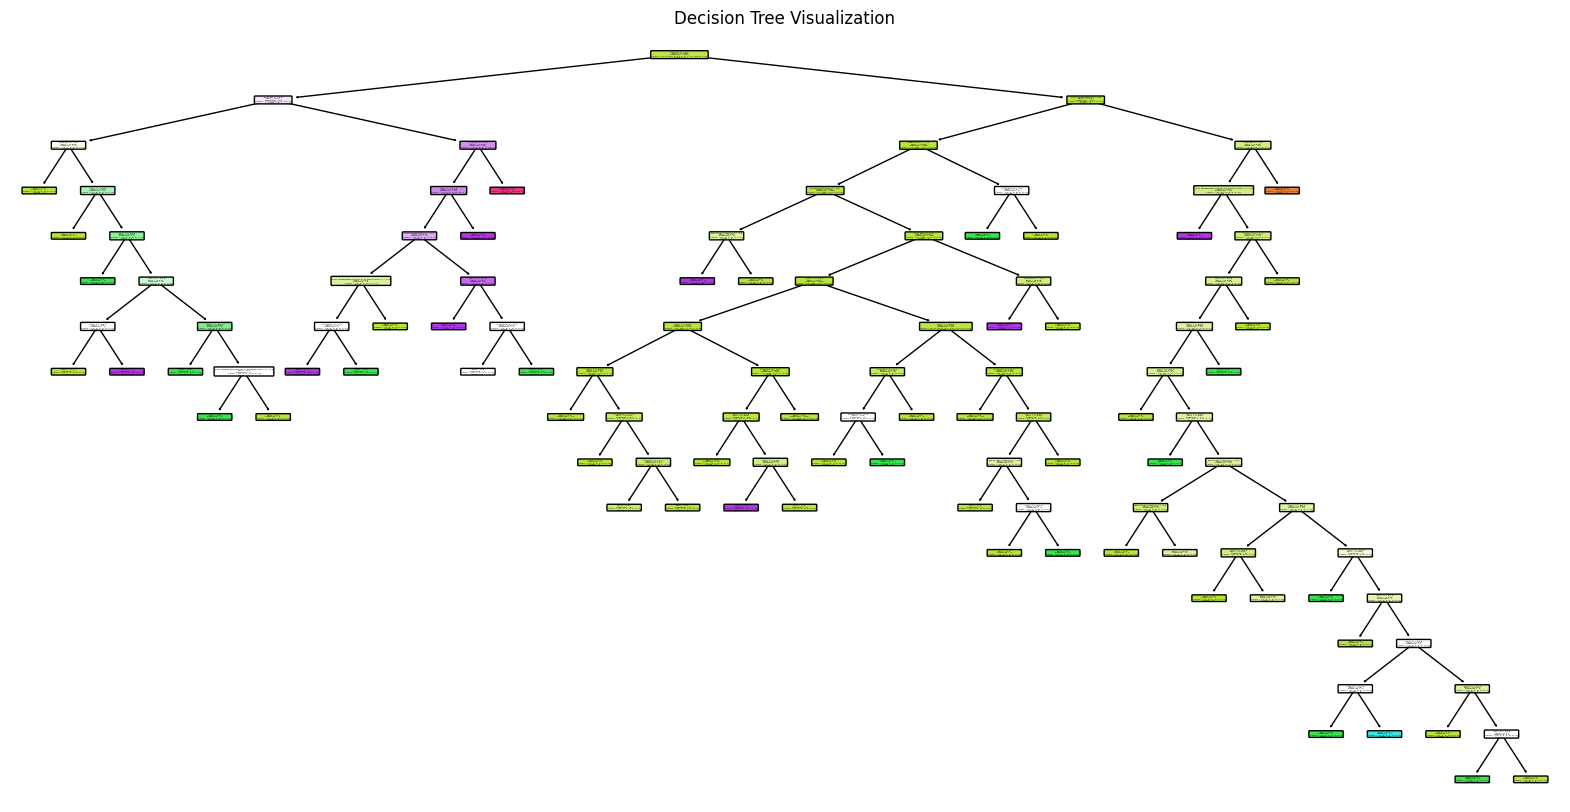

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Decision Tree Classifier
classifier = DecisionTreeClassifier()
classifier.fit(X, y)

# Get unique class names from the target
class_names = list(map(str, y.unique()))

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


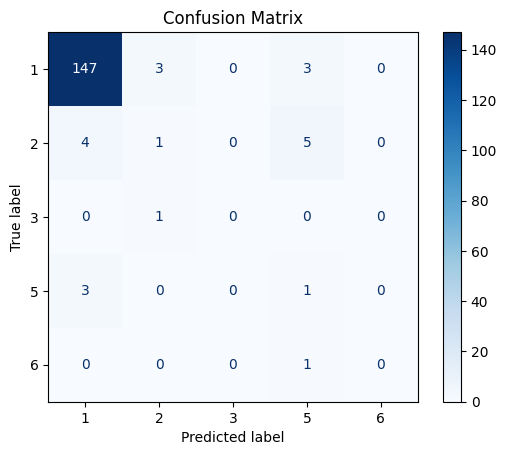

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get unique class names from the target (testing data)
class_names = list(map(str, sorted(y_test.unique())))

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


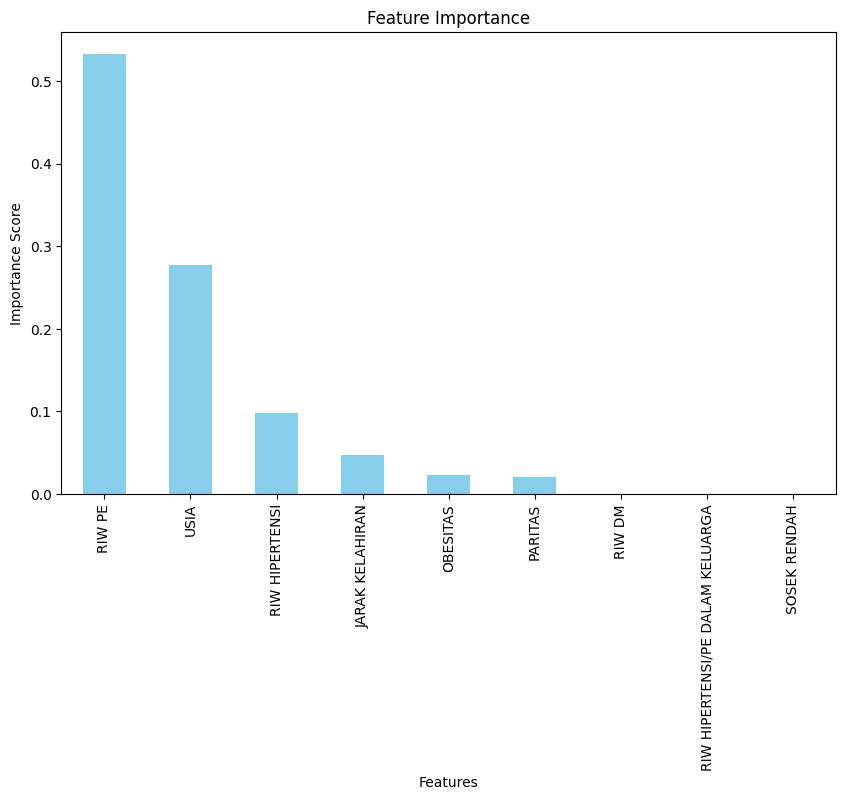

In [11]:
# Plotting the feature importance
import pandas as pd

plt.figure(figsize=(10, 6))
feature_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
